In [1]:
#import the needed packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
#read the training file
file_path='D://PHBS/CEF/code/MLF/HW/GiveMeSomeCredit'

train=pd.read_csv(file_path+'/cs-training.csv')

train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
#Read the test file
test=pd.read_csv(file_path+'/cs-test.csv')

test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [4]:
#Read the actual probability which is y 
y_test=pd.read_csv(file_path+'/sampleEntry.csv')
y_test=y_test['Probability'].values
print(y_test)

#Seperate the y value into 0 and 1
y_test[y_test<0.5]=0
y_test[y_test>=0.5]=1
print(y_test)

[0.08080665 0.04071874 0.01196834 ... 0.00696991 0.12199356 0.04424841]
[0. 0. 0. ... 0. 0. 0.]


In [5]:
#fill the null value
X_train=train.fillna(train.mean())
X_test=test.fillna(test.mean())

#select the X labels and y labels
X_labels=train.columns[2:]
y_labels=train.columns[1]

#get the needed data and transform them into numpy type
X_train_values=X_train[X_labels].values
y_train=X_train[y_labels].values
X_test=X_test[X_labels].values

#Standardlize the data
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train_values)
X_test_std=sc.fit_transform(X_test)

In [13]:
#using the PCA method to rank the explained ratio for variables
pca=PCA()
X_train_pca=pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.29948872, 0.1533157 , 0.12254696, 0.10092078, 0.10010863,
       0.09344974, 0.073465  , 0.05430268, 0.00172094, 0.00068085])

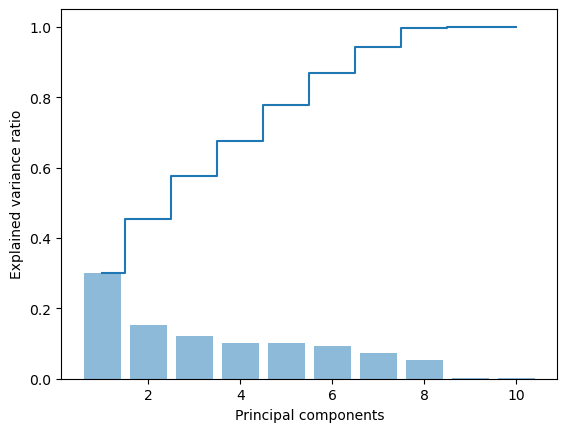

In [14]:
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [15]:
#choose the five variables with the highest explained ratio
pca=PCA(n_components=5)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

In [8]:
#use LR to fit the train set and test the accuracy for test set
lr=LogisticRegression(C=10,multi_class='ovr',random_state=1,solver='lbfgs')
lr=lr.fit(X_train_pca,y_train)

y_pred=lr.predict(X_test_pca)
accuracy=accuracy_score(y_test,y_pred)
print("Test accuracy is {}".format(accuracy.round(3)))

Test accuracy is 0.984


In [9]:
#use SVM to fit the train set and test the accuracy for test set
svm=SVC(kernel='rbf',random_state=1,gamma=0.1,C=10)
svm.fit(X_train_pca,y_train)

y_pred=svm.predict(X_test_pca)
accuracy=accuracy_score(y_test,y_pred)
print("Test accuracy is {}".format(accuracy.round(3)))

Test accuracy is 0.986


In [17]:
#use decision tree to fit the train set and test the accuracy for test set
tree_model = DecisionTreeClassifier(max_depth=5,random_state=1)
tree_model.fit(X_train_pca, y_train)

y_pred=tree_model.predict(X_test_pca)
accuracy=accuracy_score(y_test,y_pred)
print("Test accuracy is {}".format(accuracy.round(3)))

Test accuracy is 0.989


In [18]:
#Implement the LR method using pipeline
pipe_LR=make_pipeline(StandardScaler(),
                     PCA(n_components=5),
                     LogisticRegression(C=10,multi_class='ovr',random_state=1,solver='lbfgs'))

pipe_LR.fit(X_train_values,y_train)
y_pred=pipe_LR.predict(X_test)
print('Test Accuracy: %.3f' % pipe_LR.score(X_test, y_test))

Test Accuracy: 0.984


In [43]:
#Implement the SVM method using pipeline
pipe_svm=make_pipeline(StandardScaler(),
                      PCA(n_components=5),
                      SVC(kernel='rbf',random_state=1,gamma=0.1,C=10))

pipe_svm.fit(X_train_values,y_train)
y_pred=pipe_svm.predict(X_test)
print('Test Accuracy: %.3f' % pipe_svm.score(X_test, y_test))

Test Accuracy: 0.987


In [19]:
#Implement the decision tree method using pipeline
pipe_tree=make_pipeline(StandardScaler(),
                      PCA(n_components=5),
                      DecisionTreeClassifier(max_depth=5,random_state=1))

pipe_tree.fit(X_train_values,y_train)
y_pred=pipe_tree.predict(X_test)
print('Test Accuracy: %.3f' % pipe_tree.score(X_test, y_test))

Test Accuracy: 0.988


In [20]:
#Use grid search for finding optimal hyperparameters for LR method
pipe_LR=make_pipeline(StandardScaler(),
                      PCA(n_components=4),
                      LogisticRegression(multi_class='ovr',random_state=1))
                       
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
solver_range=["newton-cg","lbfgs","liblinear","sag","saga"]
class_range=["ovr","multinomial","auto"]

param_grid = [{'logisticregression__C': param_range, 
               'logisticregression__solver': solver_range,
               'logisticregression__multi_class':class_range}]

gs = GridSearchCV(estimator=pipe_LR, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train_values, y_train)
print(gs.best_score_)
print(gs.best_params_)

D:\sofaware\tool\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\sofaware\tool\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\sofaware\tool\Anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\sofaware\tool\Anaconda\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimato

0.9333200000000001
{'logisticregression__C': 0.0001, 'logisticregression__multi_class': 'ovr', 'logisticregression__solver': 'newton-cg'}


D:\sofaware\tool\Anaconda\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\sofaware\tool\Anaconda\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [21]:
clf = gs.best_estimator_

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.984


In [10]:
#Use grid search for finding optimal hyperparameters for decision tree method
pipe_tree=make_pipeline(StandardScaler(),
                  PCA(n_components=4),
                  DecisionTreeClassifier(random_state=1))

depth_range=[3,4,5,6,7]

param_grid=[{'decisiontreeclassifier__max_depth':depth_range,
            'decisiontreeclassifier__criterion':['gini']},
           {'decisiontreeclassifier__max_depth':depth_range,
            'decisiontreeclassifier__criterion':['entropy']},
           {'decisiontreeclassifier__max_depth':depth_range,
            'decisiontreeclassifier__criterion':['log_loss']}]

gs=GridSearchCV(estimator=pipe_tree,
               param_grid=param_grid,
               scoring='accuracy',
               refit=True,
               cv=5,
               n_jobs=-1)
gs = gs.fit(X_train_values, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9361733333333333
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5}


In [11]:
clf = gs.best_estimator_

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.988


In [ ]:
#Use grid search for finding optimal hyperparameters for svm method
#It takes long time for my computer so that I could not get the result
pipe_svm=make_pipeline(StandardScaler(),
                      PCA(n_components=4),
                      SVC(random_state=1))
                       
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svm, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train_values, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
clf = gs.best_estimator_

print('Test accuracy: %.3f' % clf.score(X_test, y_test))